## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


[과제] 로이터 데이터셋을 불러와서 아래 사항을 참조하여 다중 분류를 keras 신경망 모델을 이용하여 수행
- 데이터 벡터화
- 모델 구성 : input_shape = 10000, 출력 layer 활성화 함수 = softmax
- epochs 20으로 훈련 및 검증 결과 시각화 후 과대 적합이 시작되는 epoch 확인하여 기술

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data), len(test_data)

(8982, 2246)

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
train_labels[10]

3

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [3]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results


In [4]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.6156 - accuracy: 0.5433 - val_loss: 1.7294 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4060 - accuracy: 0.7124 - val_loss: 1.2830 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0384 - accuracy: 0.7783 - val_loss: 1.1390 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8237 - accuracy: 0.8279 - val_loss: 1.0388 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6621 - accuracy: 0.8631 - val_loss: 0.9743 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5307 - accuracy: 0.8881 - val_loss: 0.9322 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4291 - accuracy: 0.9099 - val_loss: 0.9152 - val_accuracy: 0.8190
Epoch 8/20
16

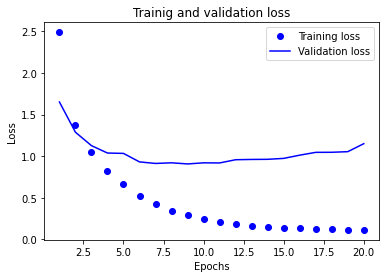

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

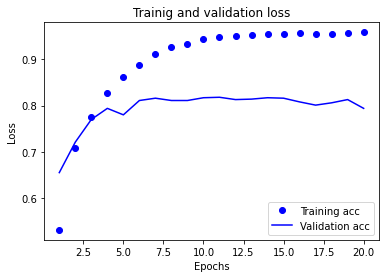

In [ ]:
plt.clf()

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 94ms/step - loss: 2.6919 - accuracy: 0.5113 - val_loss: 1.7754 - val_accuracy: 0.6040
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.4406 - accuracy: 0.6932 - val_loss: 1.3205 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.0642 - accuracy: 0.7719 - val_loss: 1.1563 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8342 - accuracy: 0.8227 - val_loss: 1.0511 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6596 - accuracy: 0.8675 - val_loss: 0.9816 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.5227 - accuracy: 0.8914 - val_loss: 0.9371 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4206 - accuracy: 0.9127 - val_loss: 0.9519 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===

[과제] 유닛수를 32개, 128개로 조정하고 한개의 은닉층을 세 개의 은닉층으로 변경하여 학습 및 평가 수행한 후 그 차이를 논하세요.

In [8]:
model = models.Sequential()

model.add(layers.Dense(32,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 3.0605 - accuracy: 0.4630 - val_loss: 2.2753 - val_accuracy: 0.5860
Epoch 2/9
16/16 [==============================] - 1s 37ms/step - loss: 1.9172 - accuracy: 0.6341 - val_loss: 1.6695 - val_accuracy: 0.6480
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.4577 - accuracy: 0.6912 - val_loss: 1.4393 - val_accuracy: 0.6930
Epoch 4/9
16/16 [==============================] - 1s 36ms/step - loss: 1.2229 - accuracy: 0.7220 - val_loss: 1.2975 - val_accuracy: 0.7040
Epoch 5/9
16/16 [==============================] - 1s 36ms/step - loss: 1.0564 - accuracy: 0.7474 - val_loss: 1.2278 - val_accuracy: 0.7100
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.9207 - accuracy: 0.7811 - val_loss: 1.1526 - val_accuracy: 0.7240
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.8007 - accuracy: 0.8128 - val_loss: 1.1137 - val_accuracy: 0.7480
Epoch 8/9
16/16 [===

In [9]:
model = models.Sequential()

model.add(layers.Dense(128,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 91ms/step - loss: 2.2301 - accuracy: 0.5231 - val_loss: 1.4444 - val_accuracy: 0.6810
Epoch 2/9
16/16 [==============================] - 1s 76ms/step - loss: 1.1829 - accuracy: 0.7324 - val_loss: 1.1994 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 1s 77ms/step - loss: 0.8548 - accuracy: 0.8062 - val_loss: 1.0260 - val_accuracy: 0.7760
Epoch 4/9
16/16 [==============================] - 1s 77ms/step - loss: 0.6154 - accuracy: 0.8633 - val_loss: 0.9340 - val_accuracy: 0.8140
Epoch 5/9
16/16 [==============================] - 1s 77ms/step - loss: 0.4808 - accuracy: 0.8919 - val_loss: 0.9537 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 78ms/step - loss: 0.3393 - accuracy: 0.9308 - val_loss: 0.9145 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 1s 78ms/step - loss: 0.2581 - accuracy: 0.9409 - val_loss: 1.1497 - val_accuracy: 0.7640
Epoch 8/9
16/16 [===